# Calculation of freediver characteristics and optimal values
See work_comparison_new12_freediving_only.nb for more details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
from uncertainties.umath import log
from scipy.optimize import minimize
import aplast

%matplotlib inline
%reload_ext autoreload
%autoreload 2


### Table of Contents

* [Dataftame creation 1](#chapter1)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [Chapter 2](#chapter2)        


### Dataframe creation 1 <a class="anchor" id="chapter1"></a>

### Dataframe creation 2 <a class="anchor" id="chapter2"></a>



In [2]:
df = aplast.divers.get_data(surname='Kawai').data

del df["speed_descent"]
print(df)
aplast.Diver(data=df).minimize()



{'surname': 'Kawai', 'depth_max': 89.0, 'time_descent': 95, 'time_ascent': 96, 'depth_gliding_descent': 28.0, 'depth_gliding_descent_error': 3.0, 'depth_gliding_ascent': 5.0, 'depth_gliding_ascent_error': 5.0, 'volume_lungs': 0.006, 'mass_body': 55.0, 'mass_ballast': 0.0, 'thickness_suit': 1.5, 'mass_suit': 0.8, 'volume_suit': 0.003, 'speed_ascent': 0.9270833333333334}
Best ballast weight 		= 0.0 kg
Average optimal ballast weight 	= 0.0+/-0 kg
Best suite thickness 		= 2.775645409921396 mm
Average optimal suite thickness 	= 2.6+/-2.1 mm

Performance gain = -1+/-22 %


{'surname': 'Kawai',
 'work': 3724.5091650661197,
 'mass_ballast_best': 0.0,
 'mass_ballast_proposal': 0.0+/-0,
 'thickness_suit_best': 2.775645409921396,
 'thickness_suit_proposal': 2.6059550304107337+/-2.09767184044772,
 'gain': -1.0543577899499668+/-22.023322895426965}

In [3]:
aplast.divers.get_data(surname='Kawai').minimize()#method='L-BFGS-B')

Best ballast weight 		= 0.0 kg
Average optimal ballast weight 	= 0.0+/-0 kg
Best suite thickness 		= 2.775645409921396 mm
Average optimal suite thickness 	= 2.6+/-2.1 mm

Performance gain = -1+/-22 %


{'surname': 'Kawai',
 'work': 3724.5091650661197,
 'mass_ballast_best': 0.0,
 'mass_ballast_proposal': 0.0+/-0,
 'thickness_suit_best': 2.775645409921396,
 'thickness_suit_proposal': 2.6059550304107337+/-2.09767184044772,
 'gain': -1.0543577899499668+/-22.023322895426965}

In [4]:
df = aplast.divers.minimize()

df.columns

Index(['surname', 'depth_max', 'time_descent', 'time_ascent',
       'depth_gliding_descent', 'depth_gliding_descent_error',
       'depth_gliding_ascent', 'depth_gliding_ascent_error', 'volume_lungs',
       'mass_body', 'mass_ballast', 'thickness_suit', 'mass_suit',
       'volume_suit', 'speed_descent', 'speed_ascent', 'volume_tissues',
       'drag_coefficient', 'work', 'mass_ballast_best',
       'mass_ballast_proposal', 'thickness_suit_best',
       'thickness_suit_proposal', 'gain'],
      dtype='object')

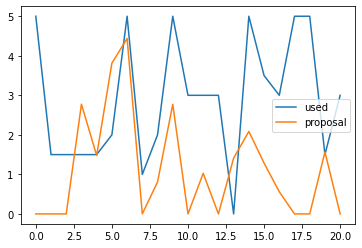

In [5]:
df["thickness_suit"].plot(label="used")
df["thickness_suit_best"].plot(label="proposal")
plt.legend()


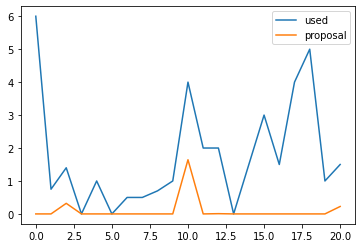

In [6]:
df["mass_ballast"].plot(label="used")
df["mass_ballast_best"].plot(label="proposal")
plt.legend()


In [7]:
df = aplast.divers.get_data()

df["volume_tissues"] = aplast.diver.get_volume_tissues(df.mass_body, df.mass_ballast, df.volume_suit, df.volume_lungs, df.speed_descent, df.speed_ascent, df["depth_gliding_descent"], df["depth_gliding_ascent"])
df["drag_coefficient"] = aplast.diver.get_drag_coefficient(df.volume_suit, df.volume_lungs, df.speed_descent, df.speed_ascent, df["depth_gliding_descent"], df["depth_gliding_ascent"])

df

,surname,depth_max,time_descent,time_ascent,depth_gliding_descent,depth_gliding_descent_error,depth_gliding_ascent,depth_gliding_ascent_error,volume_lungs,mass_body,mass_ballast,thickness_suit,mass_suit,volume_suit,speed_descent,speed_ascent,volume_tissues,drag_coefficient
0,nabrin,45.0,40,40,12.0,2.0,7.0,2.0,0.0080,70.0,6.00,5.0,3.0,0.010,1.125000,1.125000,0.065180,8.819183
1,Sychev,101.0,90,80,40.0,3.0,10.0,3.0,0.0085,83.0,0.75,1.5,1.0,0.003,1.122222,1.262500,0.078019,11.743728
2,McNally,98.0,100,95,43.0,2.0,8.0,1.0,0.0060,64.0,1.40,1.5,NaN,0.003,0.980000,1.031579,0.060633,15.670249
3,Kawai,89.0,95,96,28.0,3.0,5.0,5.0,0.0060,55.0,0.00,1.5,0.8,0.003,0.936842,0.927083,0.049718,20.056504
4,Bernard,51.0,65,65,20.0,2.0,3.0,1.0,0.0080,75.0,1.00,1.5,2.0,0.003,0.784615,0.784615,0.068286,37.638251
5,trubridge,126.0,118,100,31.0,1.0,8.0,1.0,0.0100,75.0,0.00,2.0,0.0,0.004,1.067797,1.260000,0.068227,15.467704
6,Dan,50.0,45,50,15.0,2.0,12.0,2.0,0.0080,92.0,0.50,5.0,0.0,0.010,1.111111,1.000000,0.083294,4.082099
7,Stéphane T,113.0,90,90,50.0,5.0,10.0,5.0,0.0080,71.0,0.50,1.0,NaN,0.002,1.255556,1.255556,0.066510,10.360947
8,Thomas,80.0,105,110,30.0,2.0,8.0,1.0,0.0000,70.0,0.70,2.0,0.0,0.004,0.761905,0.727273,0.067604,9.557995
9,Bruckner,40.0,45,40,20.0,4.0,10.0,2.0,0.0062,78.0,1.00,5.0,NaN,0.010,0.888889,1.000000,0.071202,13.885729


Neoprene foam density is underestimated by a factor of 3.28
170 kg/m3 => 558 kg/m3. Calculation is done with 170 kg/m3


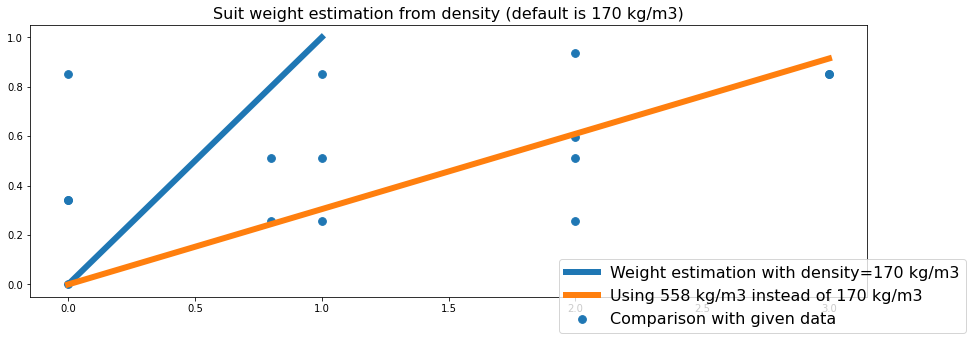

In [8]:
aplast.divers.show_foam_density()

In [9]:
#td = df["time_descent"] + df["time_ascent"]
#plt.scatter(td, df["volume_lungs"])
#df["depth_max"].hist(bins=25)

In [10]:
#aplast.divers.get_data(surname='Guillaume Néry').minimize()#method='L-BFGS-B')
#aplast.trajectory.show(aplast.divers.get_data(surname='Guillaume Néry'))


## Values from Stéphane Tourreau

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Best ballast weight 		= 0.22560848405886566 kg
Average optimal ballast weight 	= 0.3+/-0.5 kg
Best suite thickness 		= 0.0 mm
Average optimal suite thickness 	= 0.0+/-0 mm

Performance gain = -8+/-13 %
165
55.0


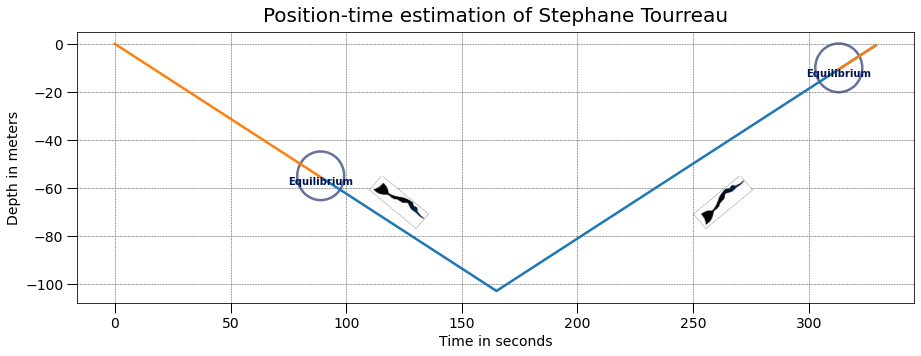

In [24]:
aplast.divers.get_data(surname='Stephane Tourreau').minimize()#method='L-BFGS-B')
aplast.trajectory.show(aplast.divers.get_data(surname='Stephane Tourreau'))

nabrin force_descent should be negative.
Otherwise, it means that diver is not going deep enough to get out the gliding zone. 14+/-7 = 11+/-7 - 761.976705 + 764.4194523636363 ; archimede2= 167.03993833333337
nabrin force_descent should be negative.
Otherwise, it means that diver is not going deep enough to get out the gliding zone. 47+/-7 = 11+/-7 - 761.976705 + 798.2850836969697 ; archimede2= 167.03993833333337
nabrin force_ascent 167.03993833333337 -25+/-7 11+/-7 761.976705 798.2850836969697
nabrin force_descent should be negative.
Otherwise, it means that diver is not going deep enough to get out the gliding zone. 81+/-7 = 11+/-7 - 761.976705 + 832.150715030303 ; archimede2= 167.03993833333337
nabrin force_ascent 167.03993833333337 -59+/-7 11+/-7 761.976705 832.150715030303
nabrin force_descent should be negative.
Otherwise, it means that diver is not going deep enough to get out the gliding zone. 115+/-7 = 11+/-7 - 761.976705 + 866.0163463636364 ; archimede2= 167.03993833333337
nab

/home/guydegnol/projects/aplast/aplast/diver.py:134: RuntimeWarning: invalid value encountered in log
  return unc.ufloat(np.log(value.nominal_value), er)


<AxesSubplot:>

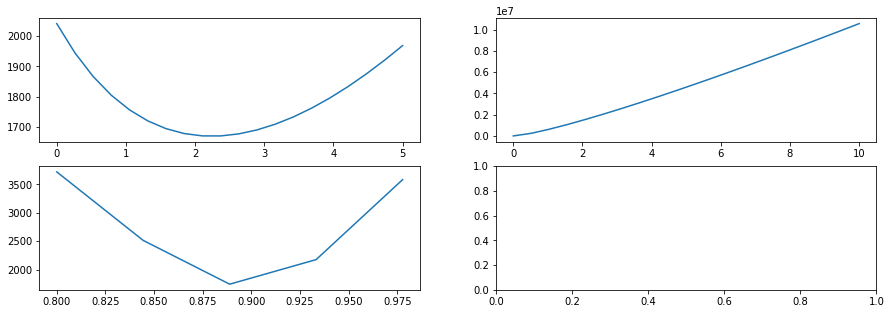

In [25]:
d = aplast.divers.get_data(surname=0)

fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=2)

d.get_total_work(variable="mass_ballast").plot(ax=ax[0][0])
d.get_total_work(variable="volume_lungs").plot(ax=ax[0][1])
d.get_total_work(variable="Rt").plot(ax=ax[1][0])

<AxesSubplot:>

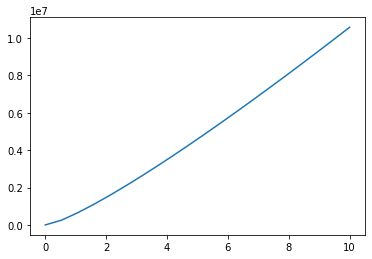

In [26]:
d.get_total_work(variable="volume_lungs").plot()

<AxesSubplot:>

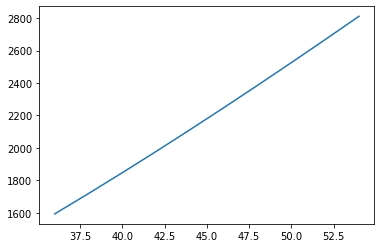

In [27]:
d.get_total_work(variable="depth_max").plot()

<AxesSubplot:>

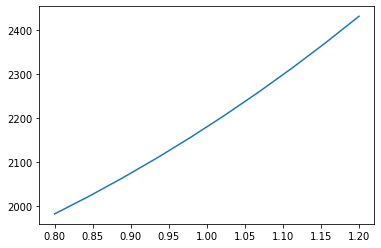

In [28]:
d.get_total_work(variable="speed_factor").plot()